# Analysez des données de systèmes éducatifs

# EXO
Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4 000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site.

Pour la pré-analyse, pourrais-tu :

Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
    Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

Merci !

# Sommaire
## I) <a href="#1">Préparation de l'environnement</a>
## II) <a href="#2">Importation et aperçu de la data</a>
## III) <a href="#3">Choix des Indicateurs</a>
## IV) <a href="#4">Compilation des Données</a>
## V) <a href="#5">Nettoyage des Données</a>
## VI) <a href="#6">Analyse des données</a>

<a name="1"> # Préparation de l'environnement </a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<a name="2"> # Importation et aperçu de la data </a>

In [5]:
edstatsdata = pd.read_csv('Data\EdStatsData.csv', sep=',')

In [6]:
edstatsseries = pd.read_csv('Data\EdStatsSeries.csv', sep=',')

In [7]:
edstatscountry = pd.read_csv('Data\EdStatsCountry.csv', sep=',')

In [8]:
edstatscountryseries = pd.read_csv('Data\EdStatsCountry-Series.csv', sep=',')

In [9]:
edstatsfootnote = pd.read_csv('Data\EdStatsFootNote.csv', sep=',')

In [10]:
print(edstatsfootnote)

       CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncerta

In [11]:
print(edstatscountryseries)

    CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statistics South Africa, United...      

In [12]:
print(edstatscountry)

    Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       

In [13]:
print(edstatsseries)

                      Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                              

In [14]:
print(edstatsdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

# comporte-t-il beaucoup de données manquantes, dupliquées ?
### -Données manquante : 

In [15]:
print(edstatsdata.isnull().sum())

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


In [16]:
print(edstatsseries.isnull().sum())

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64


In [17]:
print(edstatscountry.isnull().sum())

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [18]:
print(edstatscountryseries.isnull().sum())

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64


In [19]:
print(edstatsfootnote.isnull().sum())

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64


# comporte-t-il beaucoup de données manquantes, dupliquées ?
### -Données dupliquées : 

In [20]:
edstatsdata.loc[edstatsdata['Country Name'].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# nombre de colonnes ? nombre de lignes ?
EdStats FootNote [643638 rows x 5 columns]
EdStatsCountry-Series [613 rows x 4 columns]
EdStatsCountry [241 rows x 32 columns]
EdStatsSeries [3665 rows x 21 columns]
EdStats Data [886930 rows x 70 columns]

In [21]:
print(edstatsdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [22]:
Countries=edstatsdata['Country Name'].unique()
print(Countries)

['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British

<a name="3"> # Choix des Indicateurs </a>

In [23]:
Indicator=edstatsdata['Indicator Name'].unique()
print(Indicator)

['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 ... 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)']


In [24]:
ID_Indic = [2084,1375,1335,1339,1245,1251,3348,2533,2307,1260,1214,1204,1191,1201]

IndicatorsTrue = Indicator[ID_Indic]

print(IndicatorsTrue)

['Personal computers (per 100 people)' 'Internet users (per 100 people)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Unemployment, total (% of total labor force)' 'Population, total'
 'Population growth (annual %)'
 'Government expenditure on education as % of GDP (%)'
 'Enrolment in upper secondary education, both sexes (number)'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes']


### Nombre d'indicateur

In [25]:
Indicators = edstatsdata['Indicator Name'].unique()

print(Indicators.shape)

(3665,)


In [26]:
CountriesTrue = Countries[25:]
print(CountriesTrue[:10])

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']


 #  <a name="4">Compilation Données </a>

In [27]:
edstatsdataTrue=edstatsdata[(edstatsdata['Country Name'].isin(CountriesTrue)) & (edstatsdata['Indicator Name'].isin(IndicatorsTrue))].copy()

In [28]:
print(edstatsdataTrue['Indicator Name'].unique())
print('///////////////////////////////////////////////')
print(edstatsdataTrue['Country Name'].unique())

['Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in upper secondary education, both sexes (number)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Government expenditure on education as % of GDP (%)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'Internet users (per 100 people)' 'Personal computers (per 100 people)'
 'Population growth (annual %)' 'Population, total'
 'Unemployment, total (% of total labor force)']
///////////////////////////////////////////////
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'B

 # <a name="5">Nettoyage des données</a>

In [29]:
ColumnsToKeep=["Country Name","Country Code","Indicator Name","Indicator Code","2012","2013","2014","2015","2016","2017"]
edstatsdataTrue = edstatsdataTrue[ColumnsToKeep]
#Jusqu'à 2016 CAR  NUL à partir de 2017

In [30]:
edstatsdataTrue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 92816 to 886613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3038 non-null   object 
 1   Country Code    3038 non-null   object 
 2   Indicator Name  3038 non-null   object 
 3   Indicator Code  3038 non-null   object 
 4   2012            2172 non-null   float64
 5   2013            2117 non-null   float64
 6   2014            2007 non-null   float64
 7   2015            1693 non-null   float64
 8   2016            1208 non-null   float64
 9   2017            0 non-null      float64
dtypes: float64(6), object(4)
memory usage: 261.1+ KB


In [31]:
# Création d'une variable Value qui prend les valeurs de 2016 initialement. 
edstatsdataTrue['Value'] = edstatsdataTrue['2016']

# Si la valeur de 2016 est absente (nan) :
# Boucle qui attribue à la colonne 'Value' la dernière valeur connue de la ligne entre 2012 et 2016. 

for n in range(7,3,-1): 
    column=edstatsdataTrue.columns.values[n]
    print(column) # Sécurité : print du nom de la colonne pour vérifier l'incrémentation. 
    edstatsdataTrue['Value'] = edstatsdataTrue['Value'].fillna(edstatsdataTrue[column])
    
    
# Retrait des variables désormais inutiles (années), pour ne garder que 'Value', la dernière valeur connue

edstatsdataTrue=edstatsdataTrue.drop(columns=['2012','2013','2014', '2015','2016'])

2015
2014
2013
2012


In [32]:
DataPivot = edstatsdataTrue.pivot_table(index='Country Name', columns='Indicator Name', values='Value').reset_index()

DataPivot

Indicator Name,Country Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),"GNI per capita, Atlas method (current US$)",Government expenditure on education as % of GDP (%),"Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, total","Unemployment, total (% of total labor force)"
0,Afghanistan,2698816.0,831.156250,262874.0,968769.0,561.778746,570.0,3.31754,55.644409,8.662800,10.595726,2.689163,34656032.0,8.600000
1,Albania,315079.0,6015.172852,160527.0,151937.0,4124.982390,4180.0,3.53944,95.765488,58.109951,66.363445,-0.159880,2876101.0,15.200000
2,Algeria,NaN,3198.919434,1289474.0,NaN,3916.881571,4220.0,NaN,NaN,36.922279,42.945527,1.825463,40606052.0,11.500000
3,American Samoa,NaN,NaN,NaN,NaN,11834.745229,NaN,NaN,NaN,NaN,NaN,0.111575,55599.0,NaN
4,Andorra,4395.0,NaN,501.0,1288.0,36988.622030,NaN,3.25368,NaN,NaN,97.930637,-0.944017,77281.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,36350.821635,NaN,NaN,NaN,NaN,59.608316,-0.603319,102951.0,8.000000
213,West Bank and Gaza,721414.0,4710.088379,221018.0,142063.0,2943.404534,3230.0,1.32232,82.996231,44.283218,61.178385,2.884693,4551566.0,27.000000
214,"Yemen, Rep.",1768102.0,NaN,NaN,701984.0,990.334774,1040.0,NaN,48.624660,NaN,24.579208,2.451502,27584213.0,16.200001
215,Zambia,NaN,NaN,56680.0,NaN,1269.573537,1360.0,NaN,NaN,3.981410,25.506579,3.002816,16591390.0,7.600000


In [33]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education per 100,000 inhabitants, both sexes   148 non-null    float64
 3   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 4   Enrolment in upper secondary education, both sexes (number)           172 non-null    float64
 5   GDP per capita (current US$)                                          200 non-null    float64
 6   GNI per capita, Atlas method (current US$)                            189 non-null    float64
 7  

In [34]:
ColumnsToKeep=["Country Name",
               "Enrolment in secondary education, both sexes (number)",
               "Enrolment in tertiary education, all programmes, both sexes (number)",
               "GDP per capita (current US$)",
               "Government expenditure on education as % of GDP (%)",
               "Internet users (per 100 people)",
               "Population growth (annual %)",
               "Population, total",
               "Unemployment, total (% of total labor force)",
               ]

DataPivot = DataPivot[ColumnsToKeep].copy()

In [35]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 3   GDP per capita (current US$)                                          200 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   141 non-null    float64
 5   Internet users (per 100 people)                                       203 non-null    float64
 6   Population growth (annual %)                                          214 non-null    float64
 7   

In [36]:
DataPivot.isna().sum()

Indicator Name
Country Name                                                             0
Enrolment in secondary education, both sexes (number)                   39
Enrolment in tertiary education, all programmes, both sexes (number)    54
GDP per capita (current US$)                                            17
Government expenditure on education as % of GDP (%)                     76
Internet users (per 100 people)                                         14
Population growth (annual %)                                             3
Population, total                                                        3
Unemployment, total (% of total labor force)                            31
dtype: int64

In [37]:
DataPivot.loc[~DataPivot.index.isin(DataPivot.dropna(thresh=6).index),  'Country Name']

3                 American Samoa
27        British Virgin Islands
36                Cayman Islands
39               Channel Islands
61                       Eritrea
64                 Faroe Islands
68              French Polynesia
74                     Gibraltar
76                     Greenland
93                   Isle of Man
101                     Kiribati
104                       Kosovo
112                        Libya
137                        Nauru
140                New Caledonia
145     Northern Mariana Islands
171    Sint Maarten (Dutch part)
182     St. Martin (French part)
Name: Country Name, dtype: object

In [38]:
DataPivot.dropna(thresh=6,inplace=True)
DataPivot.reset_index(drop=True, inplace=True)

In [39]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          199 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 173 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  160 non-null    float64
 3   GDP per capita (current US$)                                          193 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   140 non-null    float64
 5   Internet users (per 100 people)                                       194 non-null    float64
 6   Population growth (annual %)                                          199 non-null    float64
 7   

 # <a name="6">Analyse des données</a>

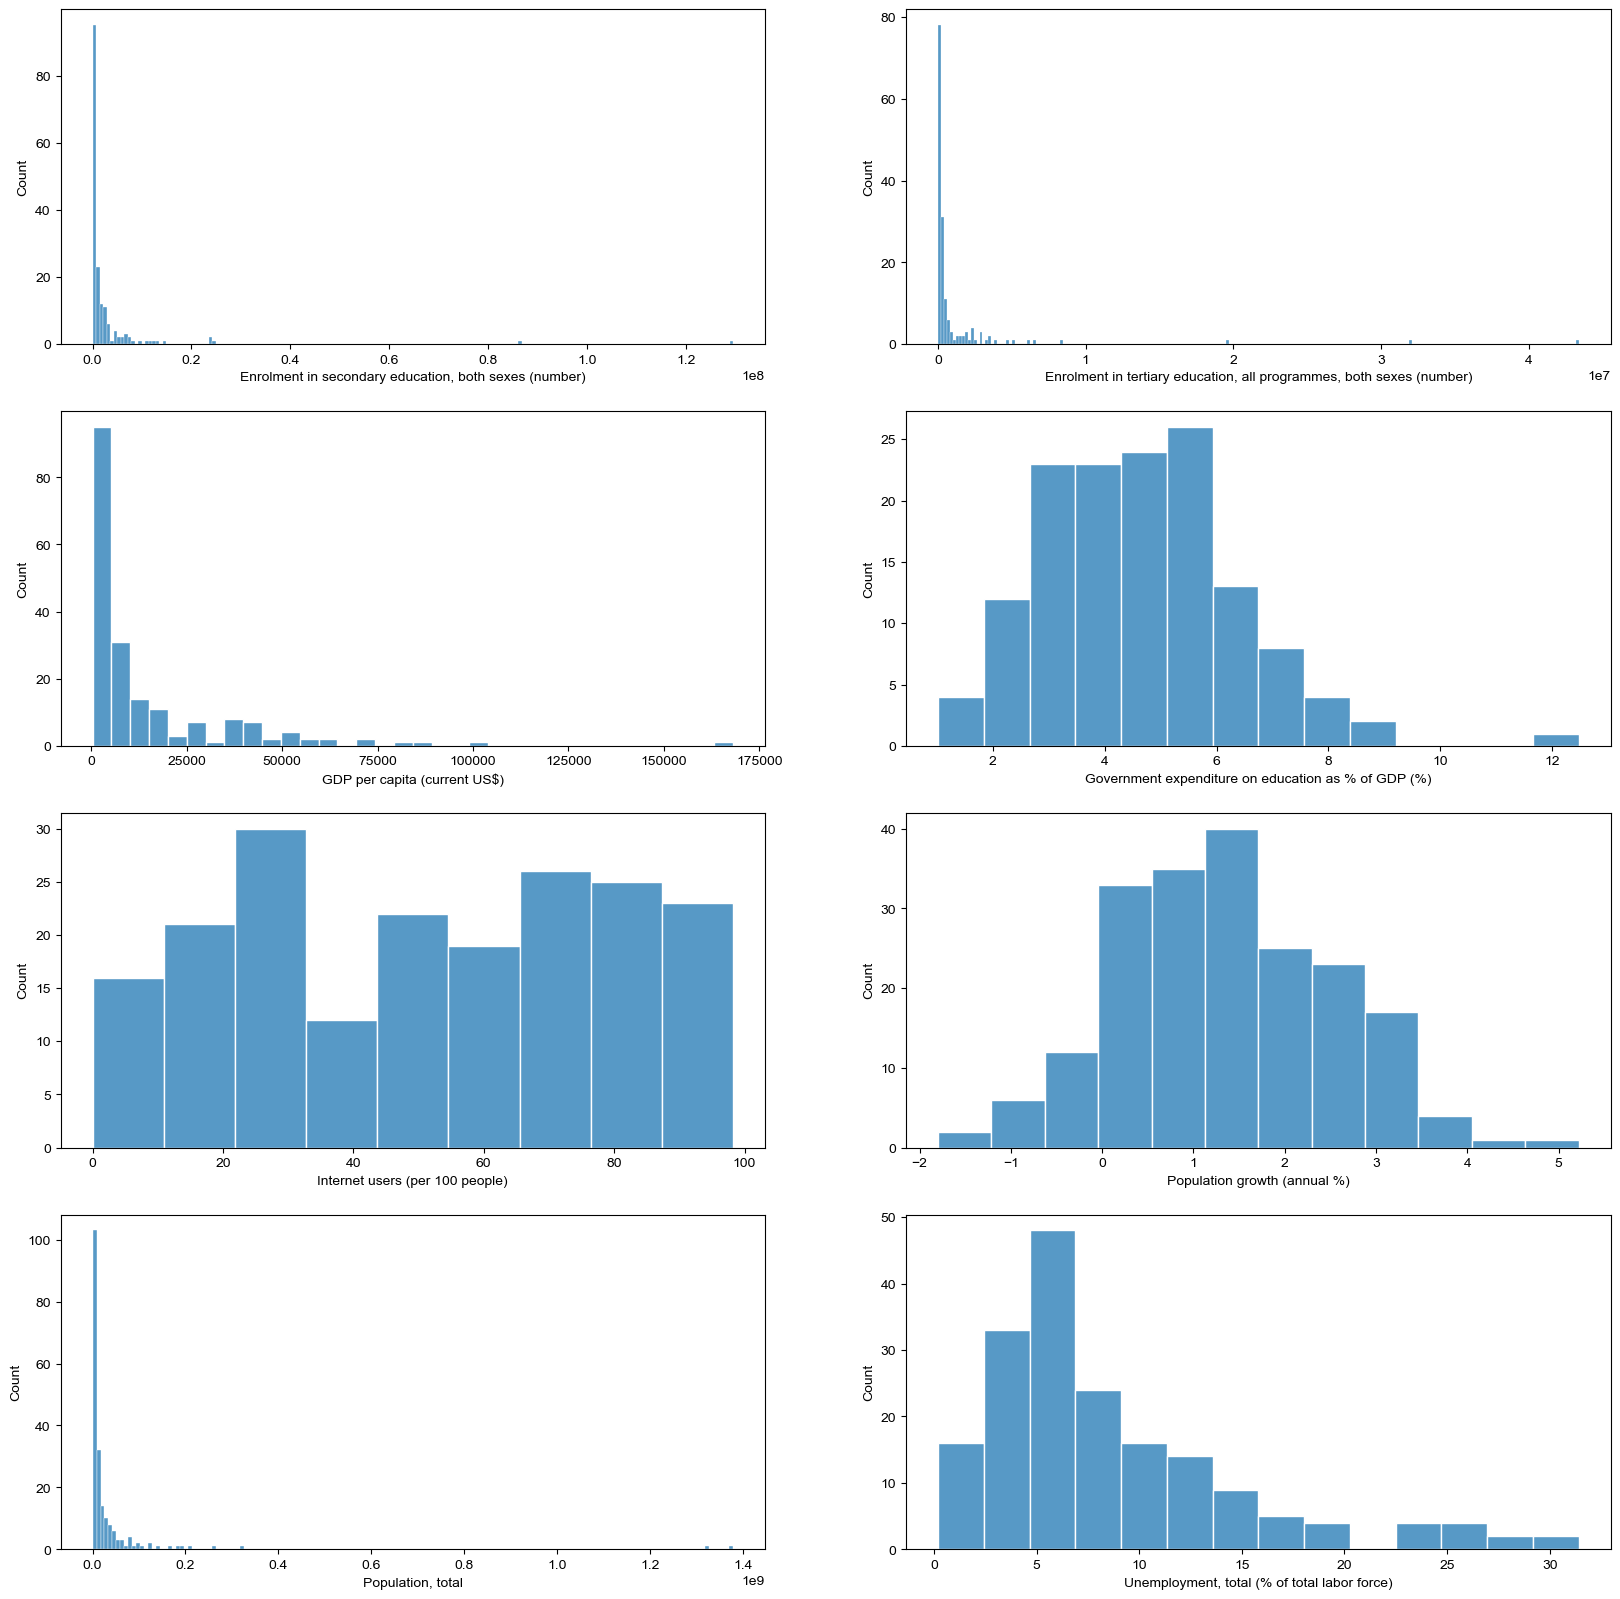

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 20)
fig, axes = plt.subplots(4, 2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0, 0], data=DataPivot, x="Enrolment in secondary education, both sexes (number)")
sns.histplot(ax=axes[0, 1], data=DataPivot, x="Enrolment in tertiary education, all programmes, both sexes (number)")
sns.histplot(ax=axes[1, 0], data=DataPivot, x="GDP per capita (current US$)")
sns.histplot(ax=axes[1, 1], data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2, 0], data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2, 1], data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3, 0], data=DataPivot, x="Population, total")
sns.histplot(ax=axes[3, 1], data=DataPivot, x="Unemployment, total (% of total labor force)")

plt.show()

In [41]:
# Transformation des données en log (naturel, népérien) pour s'approcher d'une distribution suivant une loi normal.

DataPivot["Enrolment in secondary education, both sexes (number)"] =np.log(DataPivot["Enrolment in secondary education, both sexes (number)"])
DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"] =np.log(DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"])
DataPivot["GDP per capita (current US$)"] =np.log(DataPivot["GDP per capita (current US$)"])
DataPivot["Population, total"] =np.log(DataPivot["Population, total"])




DataPivot.rename(columns={"Enrolment in secondary education, both sexes (number)" : "log(Enrolment in secondary education (number))",
                           "Enrolment in tertiary education, all programmes, both sexes (number)" : "log(Enrolment in tertiary education (number))",
                           "GDP per capita (current US$)" : "log(GDP per capita (current US$))",
                           "Population, total": "log(Population, total)"
                           }, inplace=True)


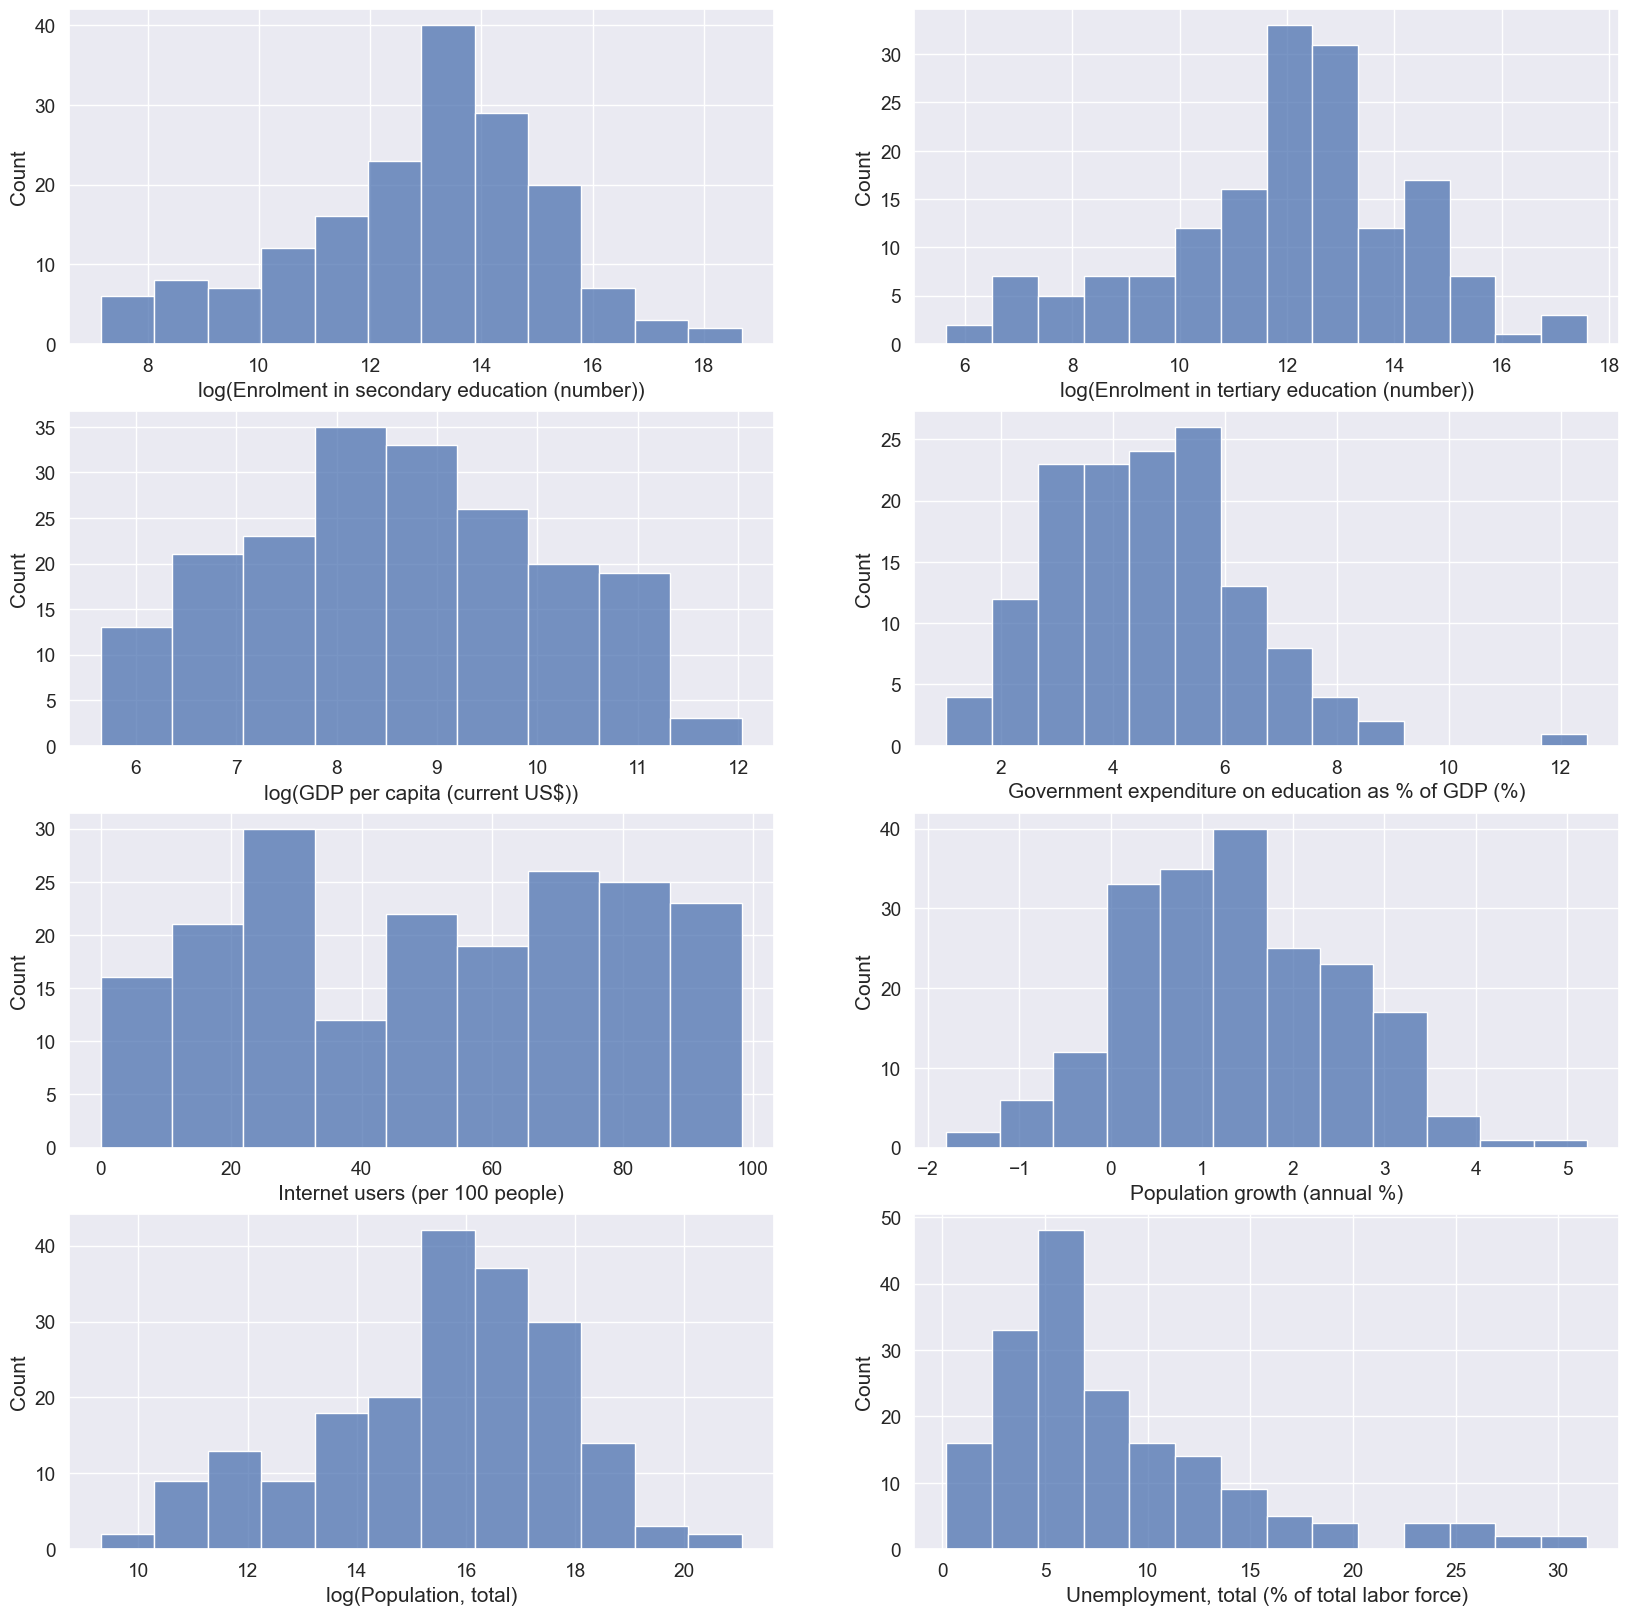

In [42]:
# Représentation des histogrammes pour chacune des variables après transformation. 

plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(4,2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=DataPivot, x="log(Enrolment in secondary education (number))")
sns.histplot(ax=axes[0,1],data=DataPivot, x="log(Enrolment in tertiary education (number))")
sns.histplot(ax=axes[1,0],data=DataPivot, x="log(GDP per capita (current US$))")
sns.histplot(ax=axes[1,1],data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2,0],data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2,1],data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3,0],data=DataPivot, x="log(Population, total)")
sns.histplot(ax=axes[3,1],data=DataPivot, x="Unemployment, total (% of total labor force)")


#fig.tight_layout()

plt.show()

C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


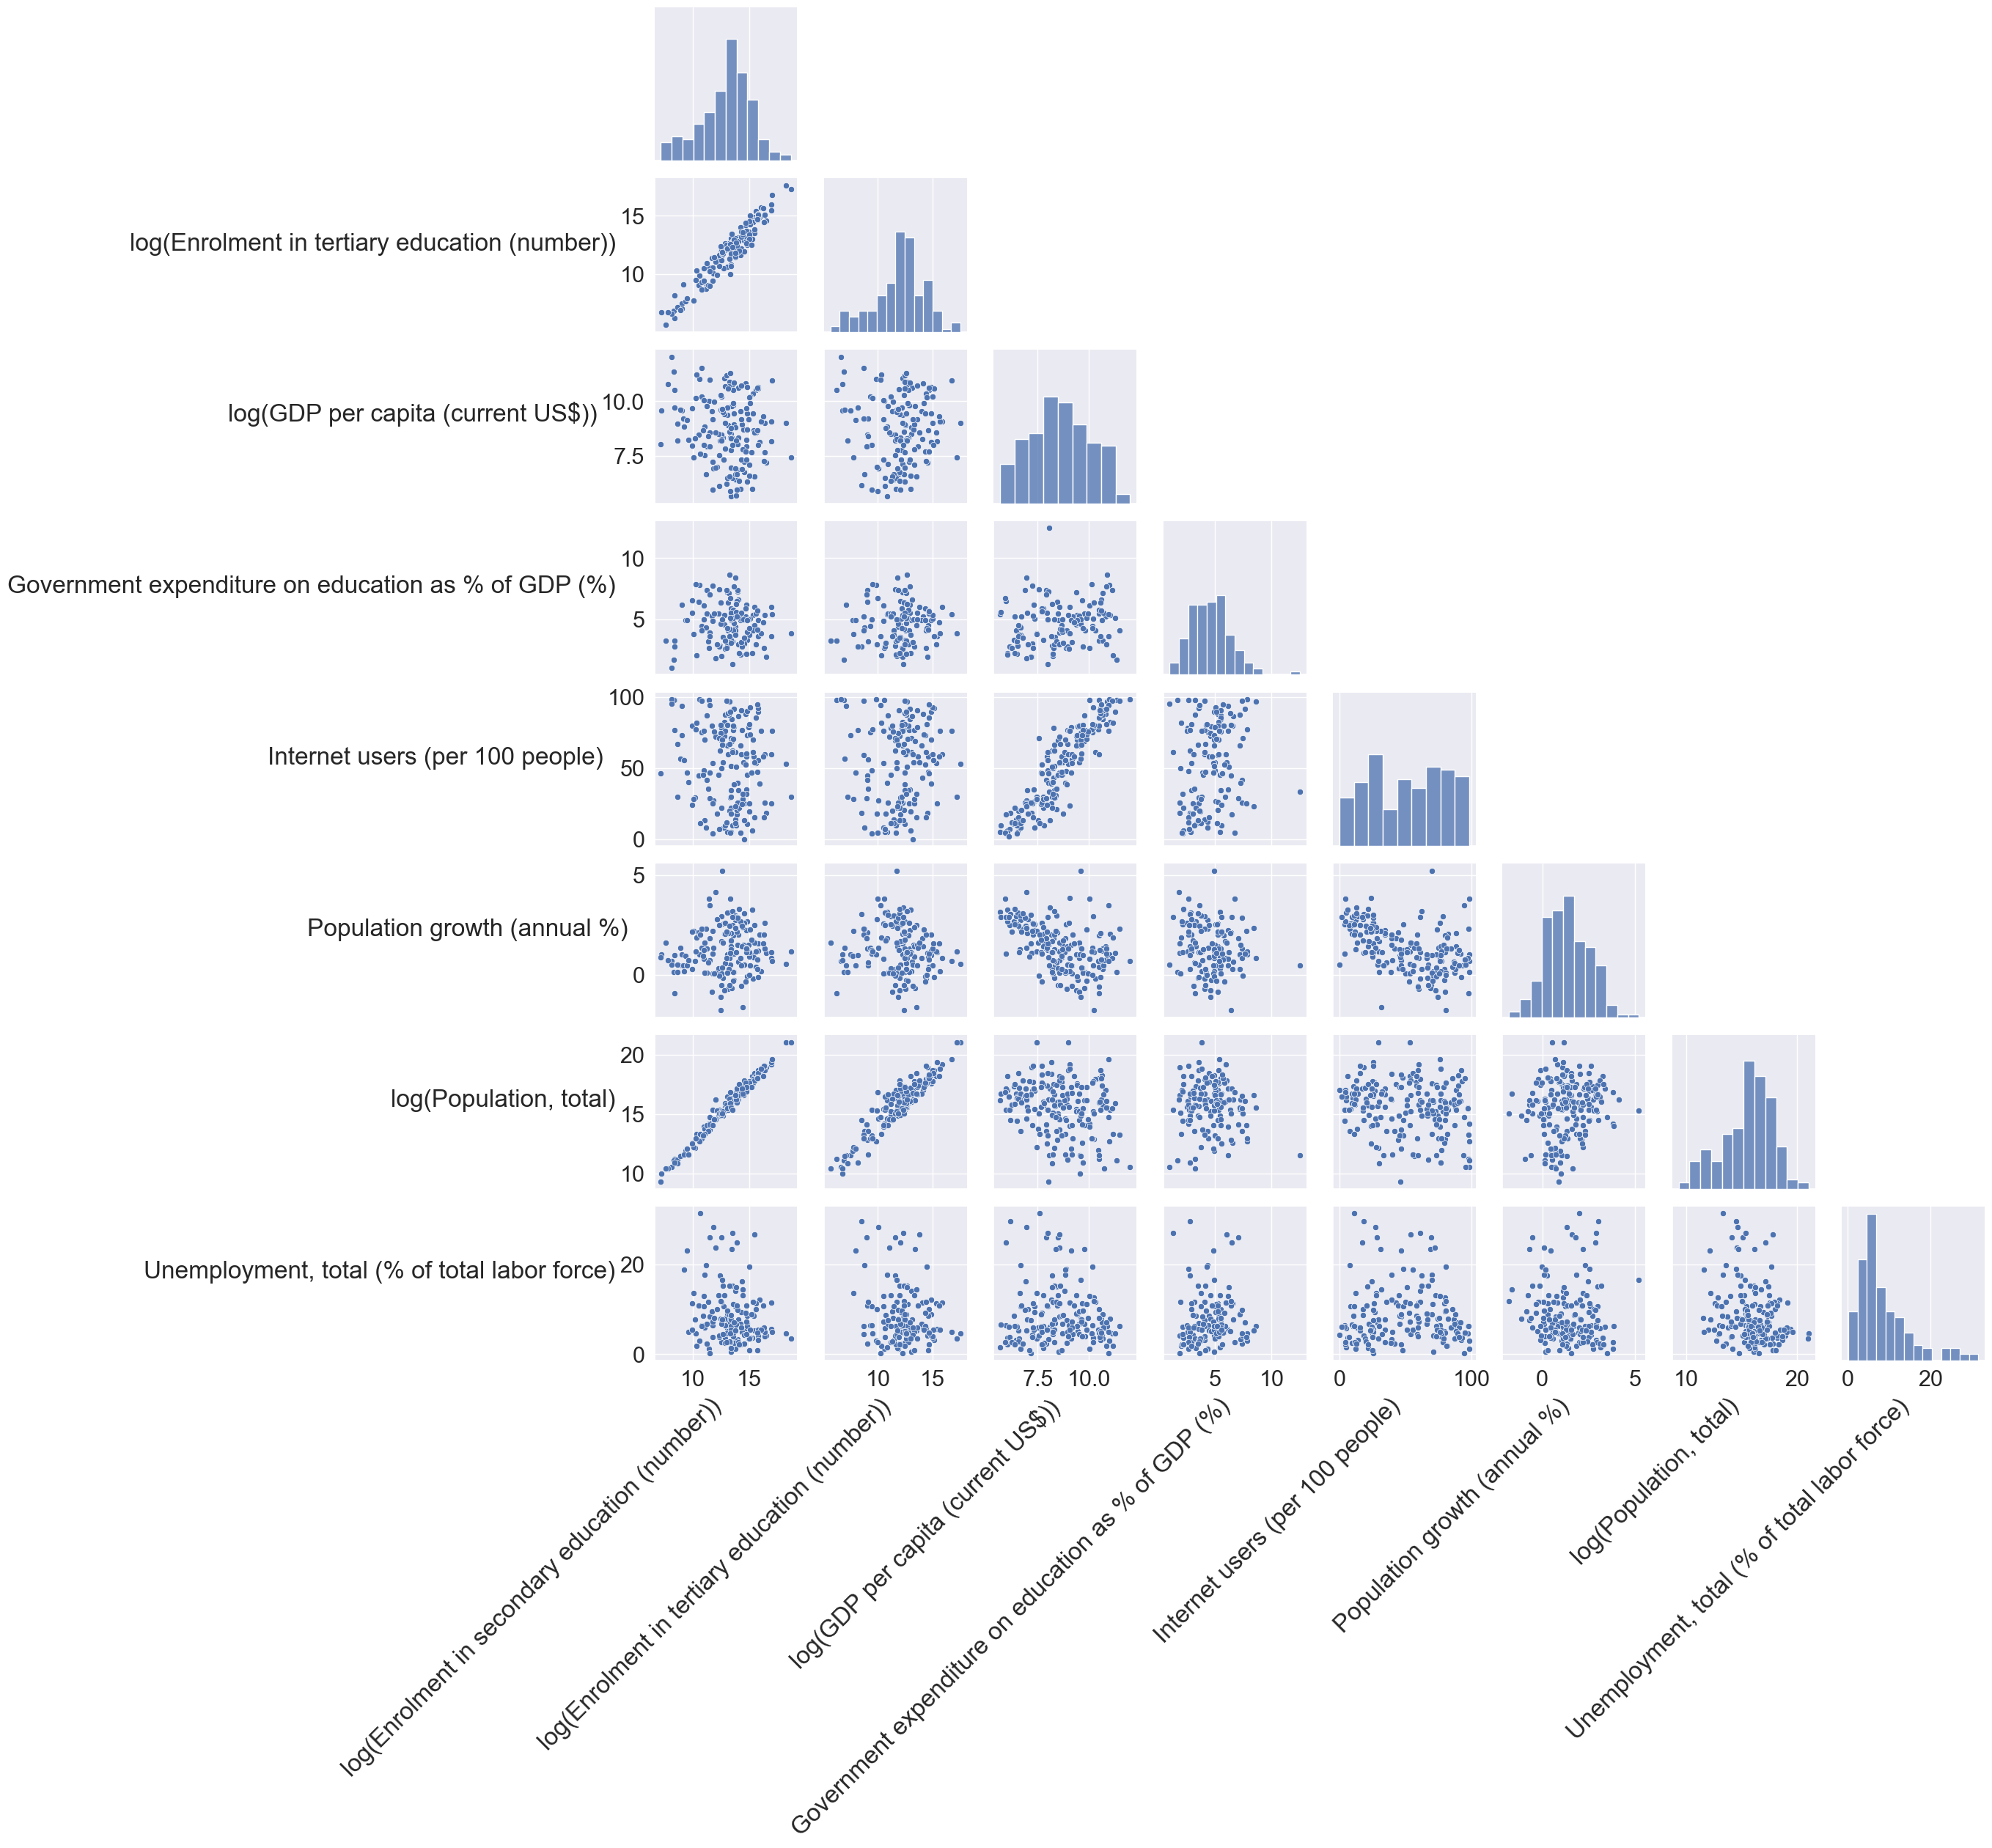

In [43]:
# Pairplot afin d'avoir un apercu de la relation entre les variables. 

sns.set(font_scale=2)

g = sns.pairplot(DataPivot[DataPivot.columns.drop(['Country Name'])], corner=True)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

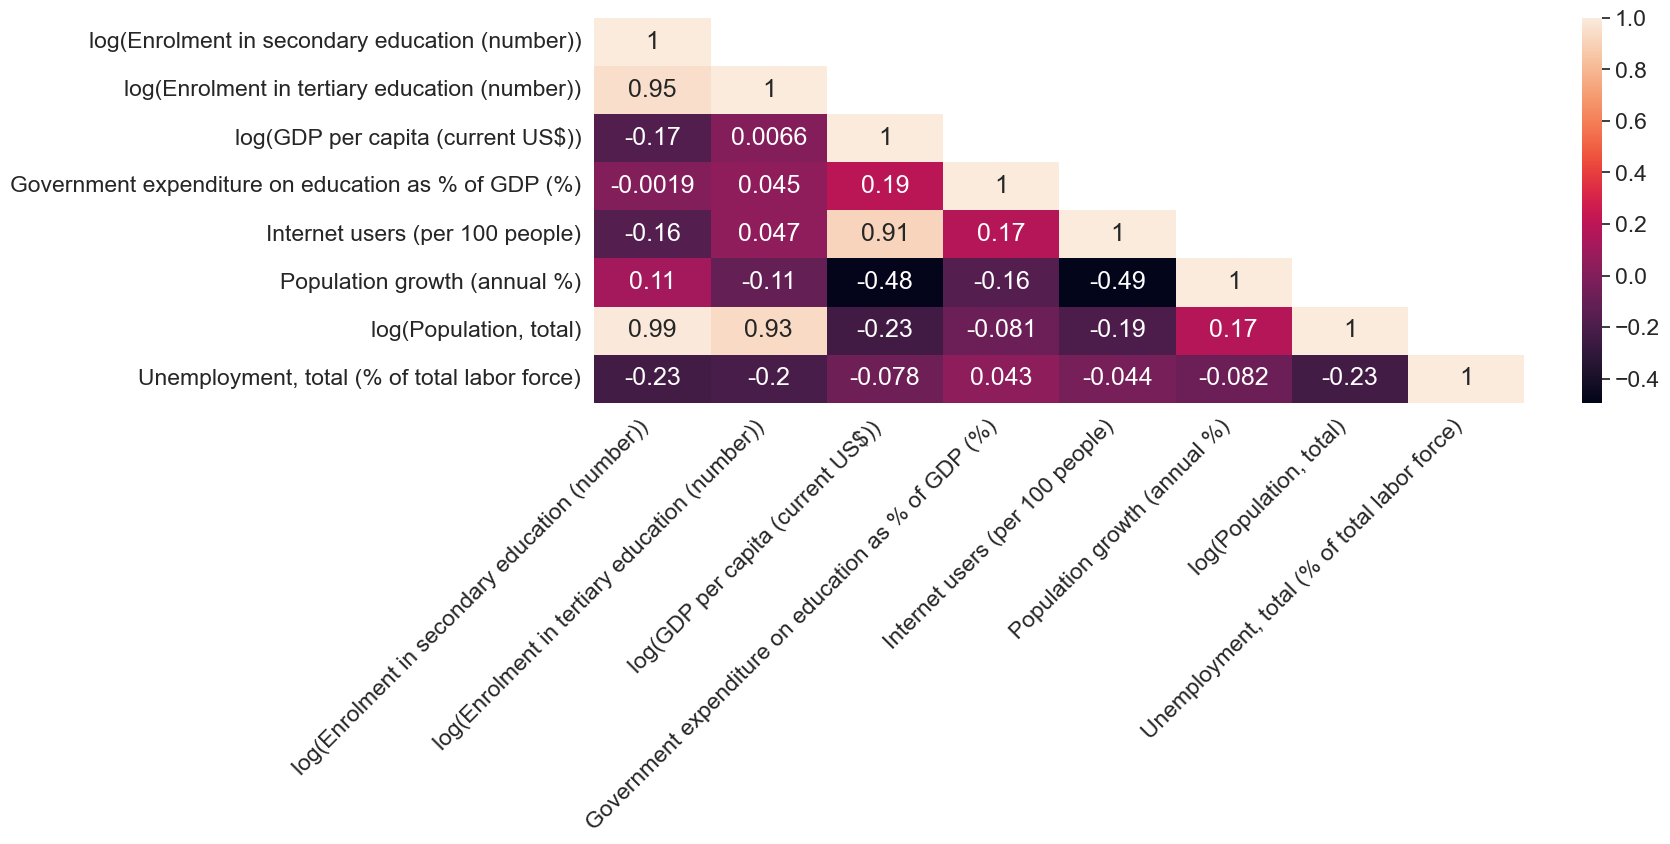

In [44]:
# Mesure du coeficient de corrélation (pearson) entre les variables. 


corr = DataPivot[DataPivot.columns.drop(['Country Name'])].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (15,5)

sns.set(font_scale=1.5,style='white')
hm = sns.heatmap(corr, annot = True,mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set(xlabel=None,ylabel=None)
plt.show()

In [45]:
#Remplissage des nan par la méthode de l'iterative_imputer. 
#Cet algorithme effectue une régression linéaire pour chaque variable en fonction de toutes les autres afin de prédire les valeurs manquantes. 

#Chargement des librairies
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Chargement de l'imputer
imputer = IterativeImputer(max_iter=100, random_state=0)

#Ajustement de l'imputer avec les données (détermination des paramètres pour chaque variable)
imputer.fit(DataPivot[DataPivot.columns.drop(['Country Name'])])

#Création d'un jeu de donnée qui prend les données d'origines puis remplace les nan par leur valeur prédite. 
DataPivot_imp = pd.DataFrame(imputer.transform(DataPivot[DataPivot.columns.drop(['Country Name'])]),columns = DataPivot[DataPivot.columns.drop(['Country Name'])].columns)

# Rajout de la colonne Country Name 

DataPivot_imp['Country Name']=DataPivot['Country Name']


In [46]:
# Reformattage des variables transformées en log dans leur dimension d'origine. 
# Addition des valeurs du secondaire et du tertiaire pour différents indicateurs afin de ne garder que le total des étudiants cibles.

DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.exp(DataPivot_imp["log(Enrolment in secondary education (number))"]) + np.exp(DataPivot_imp["log(Enrolment in tertiary education (number))"])
DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.log(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"])


DataPivot_imp=DataPivot_imp.drop(columns=["log(Enrolment in secondary education (number))",
                                          "log(Enrolment in tertiary education (number))"])



In [47]:
DataPivot_imp

Indicator Name,log(GDP per capita (current US$)),Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"log(Population, total)","Unemployment, total (% of total labor force)",Country Name,log(Enrolment in Sec. and Ter. education (number))
0,6.331108,3.317540,10.595726,2.689163,17.360982,8.600000,Afghanistan,14.901271
1,8.324817,3.539440,66.363445,-0.159880,14.871946,15.200000,Albania,13.072345
2,8.273051,4.543740,42.945527,1.825463,17.519428,11.500000,Algeria,15.382847
3,10.518366,3.253680,97.930637,-0.944017,11.255203,11.227232,Andorra,8.496174
4,8.104311,4.279432,13.000000,3.367572,17.176353,6.100000,Angola,14.561280
...,...,...,...,...,...,...,...,...
194,10.500972,4.690134,59.608316,-0.603319,11.542008,8.000000,Virgin Islands (U.S.),9.527963
195,7.987322,1.322320,61.178385,2.884693,15.330982,27.000000,West Bank and Gaza,13.756219
196,6.898043,4.391766,24.579208,2.451502,17.132754,16.200001,"Yemen, Rep.",14.541228
197,7.146436,4.389015,25.506579,3.002816,16.624394,7.600000,Zambia,13.598149


In [48]:
# La commande Describe permet d'obtenir les grandeurs statistiques générales par indicateurs
DataPivot_imp.describe()

Indicator Name,log(GDP per capita (current US$)),Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"log(Population, total)","Unemployment, total (% of total labor force)",log(Enrolment in Sec. and Ter. education (number))
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,8.639458,4.612734,51.118948,1.341010,15.503159,8.807772,13.199678
std,1.486919,1.489992,28.302628,1.172993,2.245098,6.109392,2.244332
min,5.655038,1.021950,0.000000,-1.797539,9.314430,0.200000,7.314267
25%,7.576678,3.851845,25.436440,0.496369,14.148220,4.700000,11.792348
50%,8.572553,4.612500,53.226773,1.239581,15.844497,7.000000,13.563433
75%,9.715128,5.228745,76.143368,2.205337,17.090889,11.300946,14.736108
max,12.032588,12.467750,98.240016,5.217721,21.044381,31.400000,18.900941


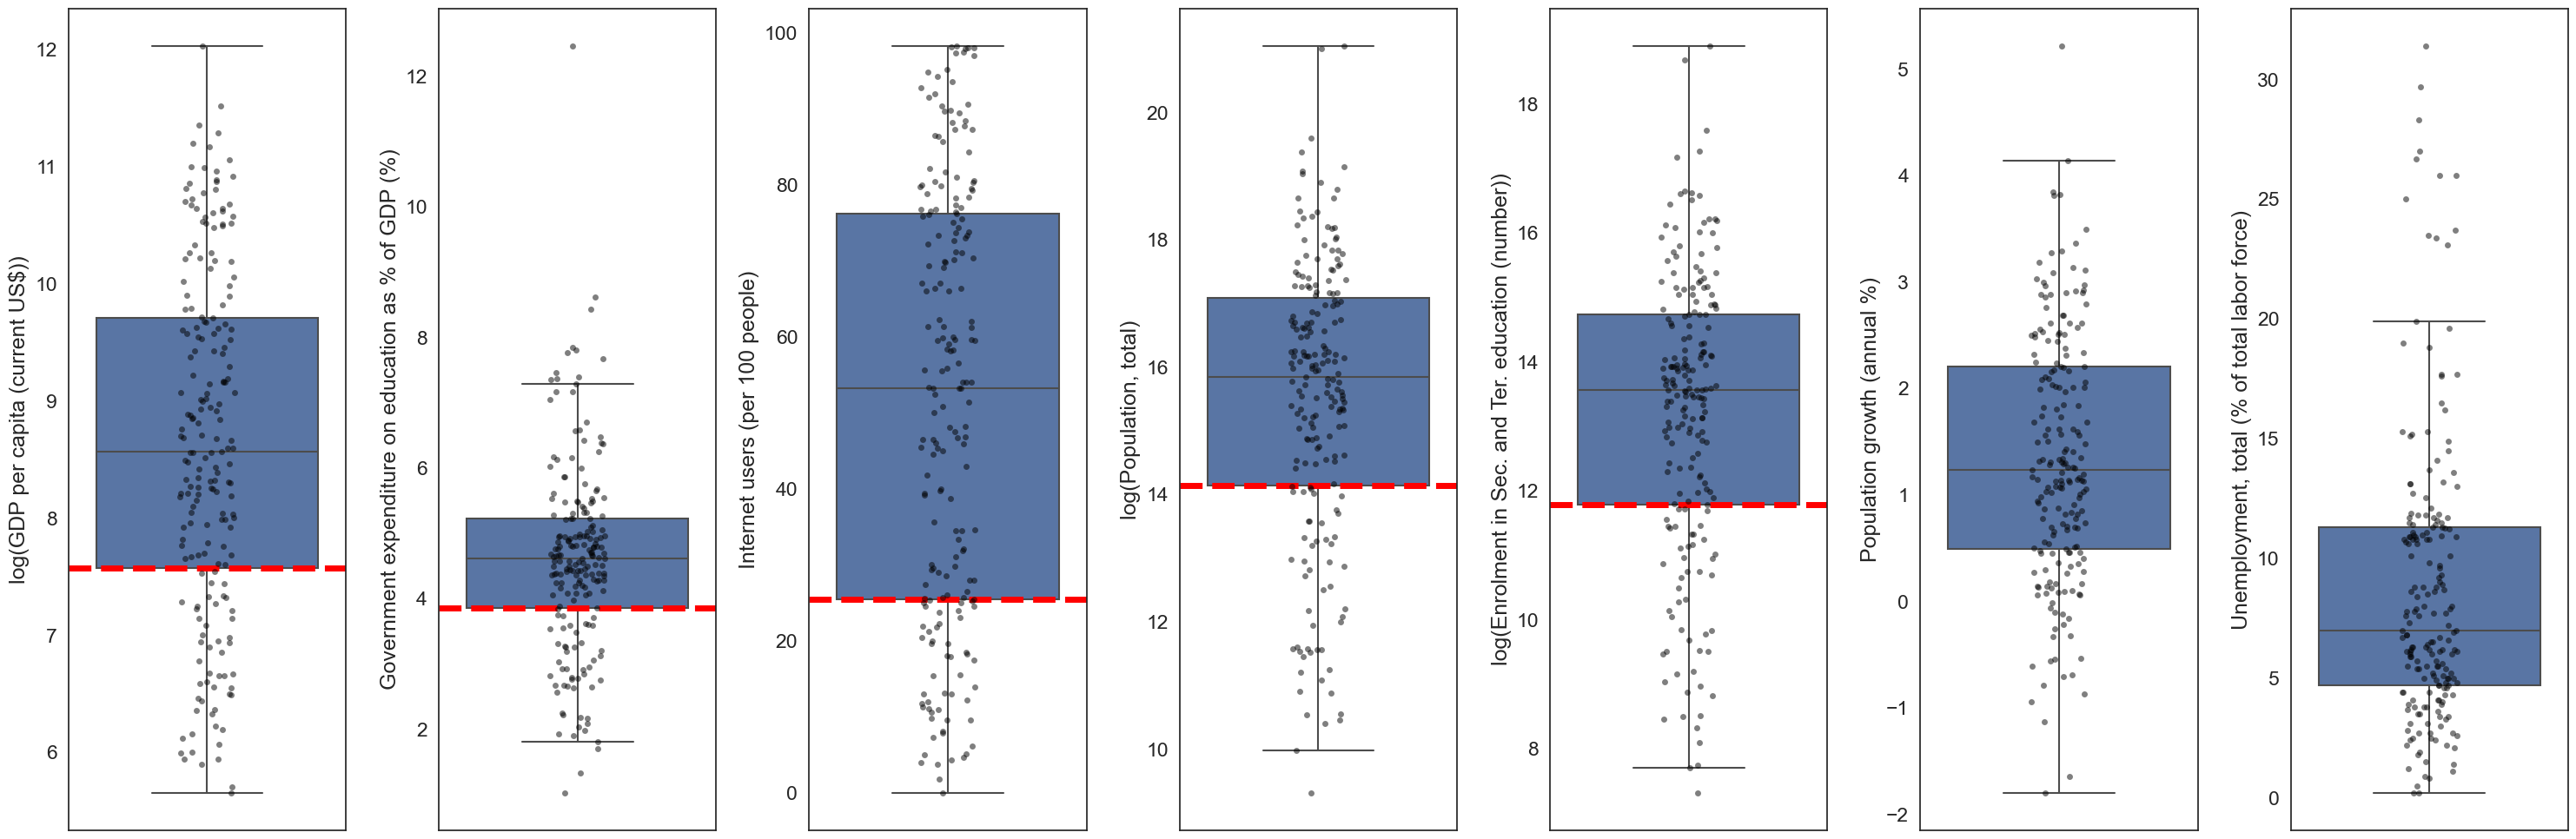

In [52]:
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(30,10))

sns.boxplot(ax=axs[0], y="log(GDP per capita (current US$))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[0],y = "log(GDP per capita (current US$))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[0].axhline(DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25), ls='--', color='red', lw=5)

sns.boxplot(ax=axs[1], y="Government expenditure on education as % of GDP (%)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[1],y = "Government expenditure on education as % of GDP (%)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[1].axhline(DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[2], y="Internet users (per 100 people)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[2],y = "Internet users (per 100 people)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[2].axhline(DataPivot_imp["Internet users (per 100 people)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[3], y="log(Population, total)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[3],y = "log(Population, total)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[3].axhline(DataPivot_imp["log(Population, total)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[4], y="log(Enrolment in Sec. and Ter. education (number))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[4],y = "log(Enrolment in Sec. and Ter. education (number))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[4].axhline(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[5], y="Population growth (annual %)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[5],y = "Population growth (annual %)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

sns.boxplot(ax=axs[6], y="Unemployment, total (% of total labor force)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[6],y = "Unemployment, total (% of total labor force)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

fig.tight_layout()

In [53]:
#L'objectif de cette étude est de déterminer les meilleurs pays susceptibles d'acceuillir l'entreprise de cours en ligne. 
#L'étape ci-dessous filtre et retire les pays dont les indicateurs pricipaux (population growth et unemployment étant minoritaire) sont inférieurs aux premiers quartiles de chaque indicateur

DataPivot_imp_F = DataPivot_imp[(DataPivot_imp["log(GDP per capita (current US$))"] >= DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25) ) & 
                                               (DataPivot_imp["Government expenditure on education as % of GDP (%)"] >= DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25)) &
                                               (DataPivot_imp["Internet users (per 100 people)"] >= DataPivot_imp["Internet users (per 100 people)"].quantile(0.25)) & 
                                               (DataPivot_imp["log(Population, total)"] >= DataPivot_imp["log(Population, total)"].quantile(0.25))& 
                                               (DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] >= DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25))].copy()

In [54]:
DataPivot_imp_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2 to 193
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    77 non-null     float64
 1   Government expenditure on education as % of GDP (%)  77 non-null     float64
 2   Internet users (per 100 people)                      77 non-null     float64
 3   Population growth (annual %)                         77 non-null     float64
 4   log(Population, total)                               77 non-null     float64
 5   Unemployment, total (% of total labor force)         77 non-null     float64
 6   Country Name                                         77 non-null     object 
 7   log(Enrolment in Sec. and Ter. education (number))   77 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.4+ KB
